In [61]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Ad_data=pd.read_csv("C:/Users/mchil/Downloads/Python batch/Python Pred Modeling All notebooks + Datasets/Python Datasets/Classification Datasets/Ad click data.csv")

Ad_data.head()

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
0,5183153,87.97,43,55901.12,185.46,product_11,Serbia,City_5,No,Mid-Night,Thursday,July,2020,0
1,4023265,51.63,50,39132.00,176.73,product_8,Turkmenistan,City_1,No,Evening,Saturday,June,2020,1
2,4708083,82.37,38,57032.36,210.60,product_6,Northern Mariana Islands,City_2,No,Morning,Tuesday,January,2020,0
3,9771815,62.06,45,48868.00,190.05,product_19,South Africa,City_3,Yes,Morning,Thursday,April,2020,1
4,6451317,77.66,31,61608.23,204.86,product_11,Guadeloupe,City_2,No,Noon,Thursday,January,2020,0


In [63]:
Ad_data.shape

(6657, 14)

In [64]:
Ad_data.duplicated().sum()

0

### Defining Problem statement
* Target :- Clicked (If user will click add or not based on various characteristics)
* Predictors: - Age,Income,country,Avg_spend_time,Ad_topic,Gender,etc.

### Analysing the distribution of Target Variable

<AxesSubplot:xlabel='Clicked'>

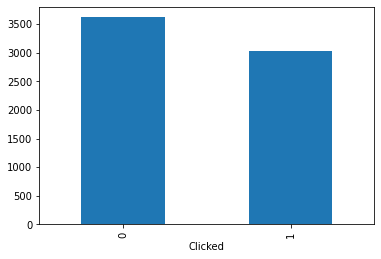

In [65]:
Ad_data.groupby('Clicked').size().plot(kind='bar')

In [66]:
#### Target Distribution is good and no treatment is need for Machine Learning
#### Deleting Qualitative Columns VisitID,Country_Name,Year
Ad_data.columns

Index(['VistID', 'Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage',
       'Ad_Topic', 'Country_Name', 'City_code', 'Male', 'Time_Period',
       'Weekday', 'Month', 'Year', 'Clicked'],
      dtype='object')

In [67]:
to_drop=["VistID","Country_Name","Year"]
Ad_data.drop(to_drop,axis=1,inplace=True)

In [68]:
Ad_data.head()

,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,City_code,Male,Time_Period,Weekday,Month,Clicked
0,87.97,43,55901.12,185.46,product_11,City_5,No,Mid-Night,Thursday,July,0
1,51.63,50,39132.00,176.73,product_8,City_1,No,Evening,Saturday,June,1
2,82.37,38,57032.36,210.60,product_6,City_2,No,Morning,Tuesday,January,0
3,62.06,45,48868.00,190.05,product_19,City_3,Yes,Morning,Thursday,April,1
4,77.66,31,61608.23,204.86,product_11,City_2,No,Noon,Thursday,January,0


### Basic Data Exploration
* Info()
* Nunique()
* Describe()

In [69]:
Ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6657 entries, 0 to 6656
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time_Spent      6657 non-null   float64
 1   Age             6657 non-null   int64  
 2   Avg_Income      6657 non-null   float64
 3   Internet_Usage  6657 non-null   float64
 4   Ad_Topic        6657 non-null   object 
 5   City_code       6657 non-null   object 
 6   Male            6657 non-null   object 
 7   Time_Period     6657 non-null   object 
 8   Weekday         6657 non-null   object 
 9   Month           6657 non-null   object 
 10  Clicked         6657 non-null   int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 572.2+ KB


In [70]:
Ad_data.describe(include='all')

,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,City_code,Male,Time_Period,Weekday,Month,Clicked
count,6657.000000,6657.000000,6657.000000,6657.000000,6657,6657,6657,6657,6657,6657,6657.000000
unique,NaN,NaN,NaN,NaN,30,9,2,6,7,7,NaN
top,NaN,NaN,NaN,NaN,product_22,City_1,No,Evening,Friday,January,NaN
freq,NaN,NaN,NaN,NaN,266,2559,3571,1266,986,988,NaN
mean,66.849548,37.258825,55930.486743,184.947684,NaN,NaN,NaN,NaN,NaN,NaN,0.456362
std,15.509672,10.995458,13110.339257,43.189896,NaN,NaN,NaN,NaN,NaN,NaN,0.498129
min,32.600000,19.000000,13996.500000,104.780000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,55.200000,28.000000,48454.000000,145.730000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,70.660000,36.000000,58183.000000,193.580000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,79.570000,46.000000,65957.000000,222.260000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [71]:
Ad_data.nunique()

Time_Spent         900
Age                 43
Avg_Income        1487
Internet_Usage     966
Ad_Topic            30
City_code            9
Male                 2
Time_Period          6
Weekday              7
Month                7
Clicked              2
dtype: int64

#### basic Exploration result
* Continuous Variables:- Time_Spent,Age,Avg_Income,Internet_Usage
* Categorical Variables :- Ad_Topic,City_code,Male,Time_Period,Weekday,Month
* Target :- Clicked

In [72]:
Conti=['Time_Spent','Age','Avg_Income','Internet_Usage']
Categ=['Ad_Topic','City_code','Male','Time_Period','Weekday','Month']
Target='Clicked'

### Univariate Analysis
* Continuous Variables

array([[<AxesSubplot:title={'center':'Time_Spent'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Avg_Income'}>,
        <AxesSubplot:title={'center':'Internet_Usage'}>]], dtype=object)

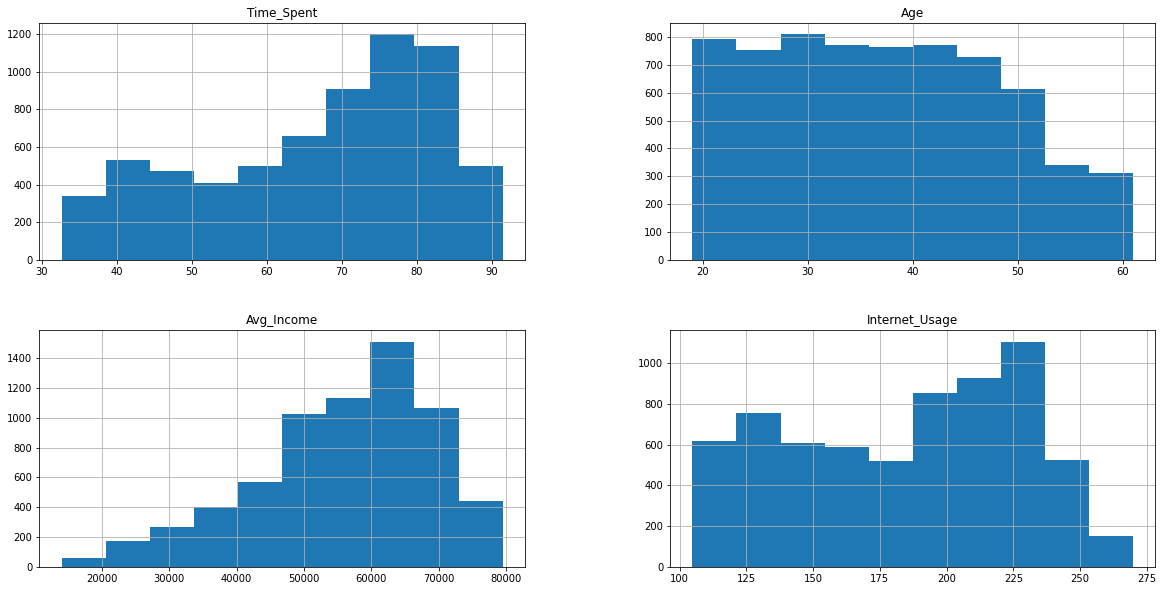

In [73]:
Ad_data[Conti].hist(figsize=(20,10))

In [74]:
# Distributions of Continuous Variables Are good no need of Any Treatment

* Categorical Variables

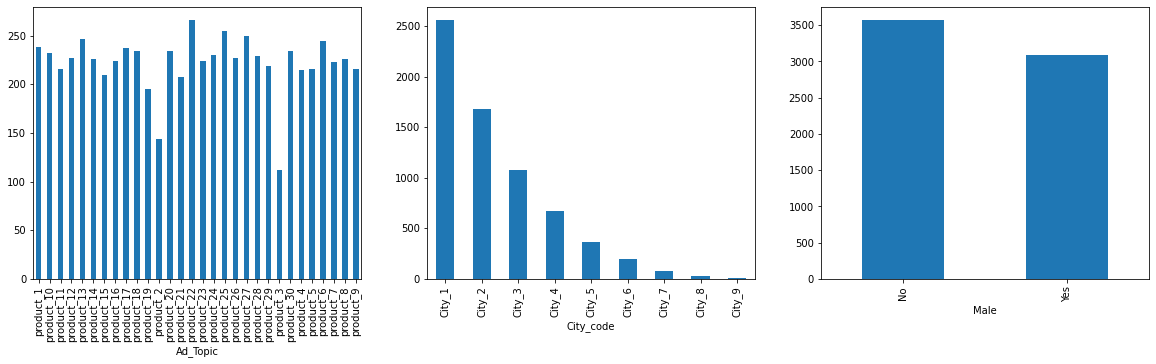

In [75]:
fig,subplot=plt.subplots(nrows=1,ncols=3,figsize=(20,5))

for i,j in zip(Categ,range(3)):
    Ad_data.groupby(i).size().plot(kind='bar',ax=subplot[j])

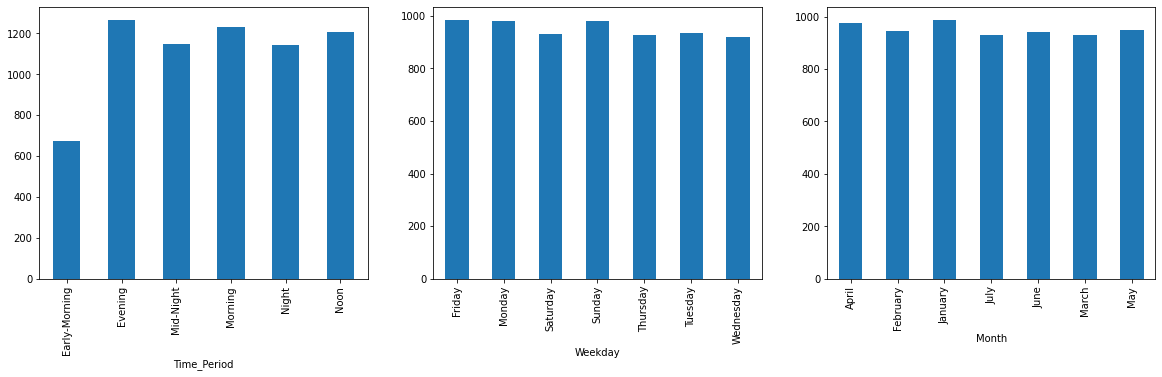

In [76]:
fig,subplot=plt.subplots(nrows=1,ncols=3,figsize=(20,5))

for i,j in zip(Categ[3:],range(3)):
    Ad_data.groupby(i).size().plot(kind='bar',ax=subplot[j])

In [77]:
# All Categorical Distributions are good and Selected

### Bivariate Analysis

* Continuous vs Categorical

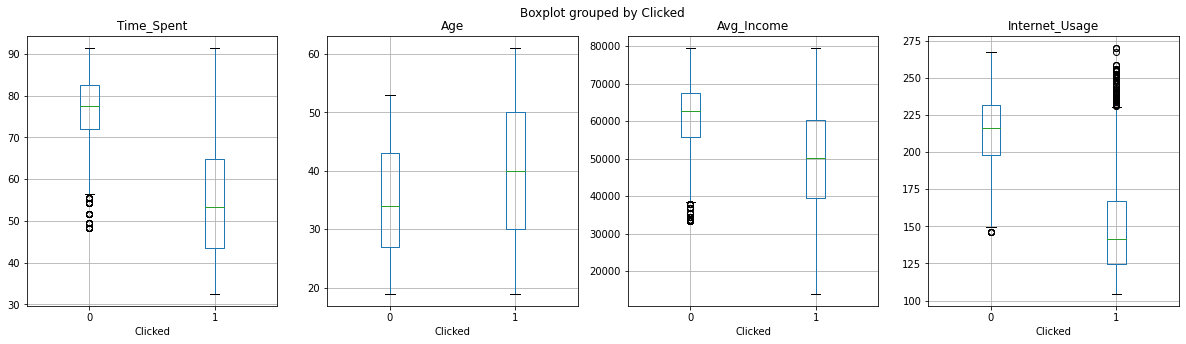

In [78]:
fig,subplot=plt.subplots(1,4,figsize=(20,5))

for i,j in zip(Conti,range(len(Conti))):
    Ad_data.boxplot(column=i,by=Target,ax=subplot[j])

#### Statistical Analysis of Conti vs Categ ANOVA Test

In [79]:
def fun_anova(df,pred,target):
    from scipy.stats import f_oneway
    selected_pred=[]
    for i in pred:
        inp=df.groupby(target)[i].apply(list)
        
        anov=f_oneway(*inp)
        
        if anov[1]<0.05:
            print("Column {} is Correlated with Target with P-Value: {}".format(i,anov[1]))
            selected_pred.append(i)
        else:
            print("Column {} is Not Correlated with Target with P-Value: {}".format(i,anov[1]))
        
        
    print("Selected Predictors :-\n",selected_pred)

fun_anova(Ad_data,Conti,Target)

Column Time_Spent is Correlated with Target with P-Value: 0.0
Column Age is Correlated with Target with P-Value: 6.40789044460054e-91
Column Avg_Income is Correlated with Target with P-Value: 0.0
Column Internet_Usage is Correlated with Target with P-Value: 0.0
Selected Predictors :-
 ['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage']


* Categorical Vs Categorical

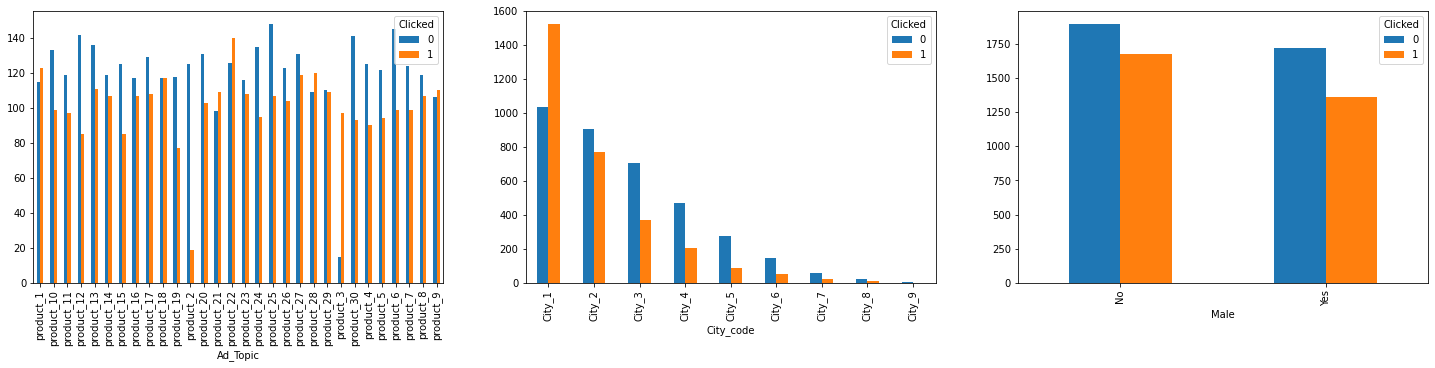

In [80]:
fig,subplot=plt.subplots(nrows=1,ncols=3,figsize=(25,5))

for i,j in zip(Categ,range(3)):
    pd.crosstab(index=Ad_data[i],columns=Ad_data[Target]).plot(kind='bar',ax=subplot[j])

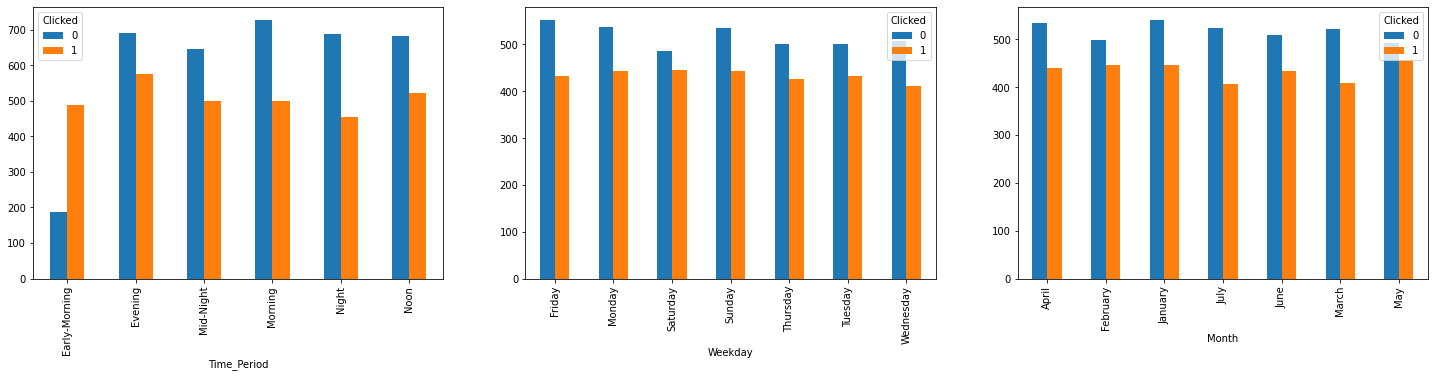

In [81]:
fig,subplot=plt.subplots(nrows=1,ncols=3,figsize=(25,5))

for i,j in zip(Categ[3:],range(3)):
    pd.crosstab(index=Ad_data[i],columns=Ad_data[Target]).plot(kind='bar',ax=subplot[j])

#### Statistical Analysis of Categ vs Categ (Ch2 Test)

In [82]:
def fun_chi2(df,pred,target):
    from scipy.stats import chi2_contingency
    selected_pred=[]
    for i in pred:
        inp=pd.crosstab(index=df[i],columns=df[target])
        
        chi=chi2_contingency(inp)
        
        if chi[1]<0.05:
            print("Column {} is Correlated with Target with P-Value: {}".format(i,chi[1]))
            selected_pred.append(i)
        
        else:
            print("Column {} is Not Correlated with Target with P-Value: {}".format(i,chi[1]))
            
    print("Selected Predictors :-\n",selected_pred)
    

fun_chi2(Ad_data,Categ,Target)

Column Ad_Topic is Correlated with Target with P-Value: 1.2676573604736642e-24
Column City_code is Correlated with Target with P-Value: 2.6667953391697526e-88
Column Male is Correlated with Target with P-Value: 0.026951713017450765
Column Time_Period is Correlated with Target with P-Value: 4.465745015735821e-47
Column Weekday is Not Correlated with Target with P-Value: 0.7226317326250824
Column Month is Not Correlated with Target with P-Value: 0.4229049097263303
Selected Predictors :-
 ['Ad_Topic', 'City_code', 'Male', 'Time_Period']


#### Selected Final Predictors
* Continuous:- ['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage']
* Categorical :- ['Ad_Topic', 'City_code', 'Male', 'Time_Period']
* Target: - Clicked

### Extracting Useful Predictors


In [83]:
final_predictors=['Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage','Ad_Topic', 'City_code', 'Male', 'Time_Period']

Ad_dataML=Ad_data[final_predictors]
# Ad_dataML['Clicked']=Ad_data[Target]

Ad_dataML.head()

,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,City_code,Male,Time_Period
0,87.97,43,55901.12,185.46,product_11,City_5,No,Mid-Night
1,51.63,50,39132.00,176.73,product_8,City_1,No,Evening
2,82.37,38,57032.36,210.60,product_6,City_2,No,Morning
3,62.06,45,48868.00,190.05,product_19,City_3,Yes,Morning
4,77.66,31,61608.23,204.86,product_11,City_2,No,Noon


### Preparing Data For ML
* Converting All Categorical Nominal Predictors to Numeric

In [84]:
Ad_dataML['Male'].replace({'No':0,'Yes':1},inplace=True)

In [85]:
Ad_dataML=pd.get_dummies(Ad_dataML)
Ad_dataML.head()

,Time_Spent,Age,Avg_Income,Internet_Usage,Male,Ad_Topic_product_1,Ad_Topic_product_10,Ad_Topic_product_11,Ad_Topic_product_12,Ad_Topic_product_13,...,City_code_City_6,City_code_City_7,City_code_City_8,City_code_City_9,Time_Period_Early-Morning,Time_Period_Evening,Time_Period_Mid-Night,Time_Period_Morning,Time_Period_Night,Time_Period_Noon
0,87.97,43,55901.12,185.46,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,51.63,50,39132.00,176.73,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,82.37,38,57032.36,210.60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,62.06,45,48868.00,190.05,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,77.66,31,61608.23,204.86,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


* Standardizing/Normalizing Data

In [86]:
X=Ad_dataML[list(Ad_dataML.columns)].values
y=Ad_data[Target].values


In [87]:
from sklearn.preprocessing import MinMaxScaler

X=MinMaxScaler().fit_transform(X)

X

array([[0.94118647, 0.57142857, 0.63987949, ..., 0.        , 0.        ,
        0.        ],
       [0.32347442, 0.73809524, 0.38381665, ..., 0.        , 0.        ,
        0.        ],
       [0.84599694, 0.45238095, 0.65715342, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.418154  , 0.88095238, 0.1539588 , ..., 1.        , 0.        ,
        0.        ],
       [0.94237634, 0.21428571, 0.76642698, ..., 0.        , 0.        ,
        0.        ],
       [0.60190379, 0.02380952, 0.69882803, ..., 0.        , 1.        ,
        0.        ]])

* Splitting Data Into Train/Test


In [88]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=32)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape,sep='\n')

(4659, 50)
(1998, 50)
(4659,)
(1998,)


### Logistic Regression


In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()

params={'C':[0.01,0.1,1,5,10],'penalty':['l1','l2'],'solver':['liblinear','newton-cg','lbfgs','lgmax']}

gcv=GridSearchCV(LR,param_grid=params,cv=10,scoring='f1_weighted')
gcv.fit(X,y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 5, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs',
                                    'lgmax']},
             scoring='f1_weighted')

In [90]:
gcv.best_params_
gcv.best_score_

0.9340216385224236

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1136
           1       0.89      0.95      0.92       862

    accuracy                           0.93      1998
   macro avg       0.93      0.93      0.93      1998
weighted avg       0.93      0.93      0.93      1998

F1 score of Fitted Model is : 0.9296330172306608


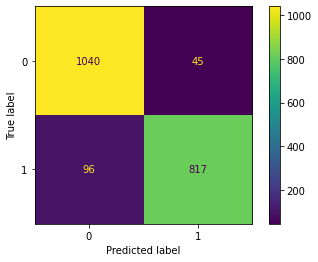

[0.93693694 0.88773764 0.92472202 0.93975226 0.92611277 0.94273948
 0.94273948 0.94280626 0.93519986 0.93517856]
Final averge f1 score of model is : 0.931392526370276
Test Accuracy of Model is :  0.9294294294294294


In [91]:
from sklearn.metrics import classification_report,plot_confusion_matrix
from sklearn.metrics import f1_score,accuracy_score
from sklearn.model_selection import cross_val_score

LR=LogisticRegression(C=1,penalty='l2',solver='newton-cg')

LR.fit(X_train,y_train)

predLR=LR.predict(X_test)

print(classification_report(predLR,y_test))
print("F1 score of Fitted Model is :",f1_score(predLR,y_test,average='weighted'))
print(plot_confusion_matrix(LR,X_test,y_test))
plt.show()

cv=cross_val_score(LR,X,y,cv=10,scoring='f1_weighted')

print(cv)
print("Final averge f1 score of model is :",np.mean(cv))
print("Test Accuracy of Model is : ",accuracy_score(predLR,y_test))


### Decision Trees

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

DT=DecisionTreeClassifier()

params={'max_depth':[i for i in range(3,16)],'criterion':['entropy','gini']}

gcv=GridSearchCV(DT,param_grid=params,cv=10,scoring='f1_weighted')
gcv.fit(X,y)
gcv.best_params_

{'criterion': 'entropy', 'max_depth': 7}

In [93]:
gcv.best_score_

0.9396751419404232

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1182
           1       0.87      0.98      0.92       816

    accuracy                           0.93      1998
   macro avg       0.93      0.94      0.93      1998
weighted avg       0.94      0.93      0.93      1998

F1 score of Fitted Model is : 0.9318878912824076


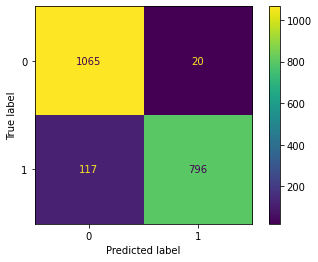

[0.94722341 0.90432612 0.92898249 0.94116318 0.93808219 0.95166089
 0.95018983 0.94112731 0.95002861 0.944126  ]
Final averge f1 score of model is : 0.9396910026808735
Test Accuracy of Model is :  0.9314314314314315


<AxesSubplot:>

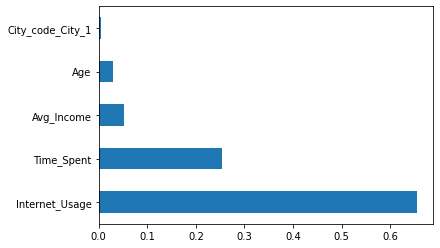

In [94]:
from sklearn.metrics import classification_report,plot_confusion_matrix
from sklearn.metrics import f1_score,accuracy_score
from sklearn.model_selection import cross_val_score

DT=DecisionTreeClassifier(max_depth=7,criterion='entropy')

DT.fit(X_train,y_train)
predDT=DT.predict(X_test)

print(classification_report(predDT,y_test))
print("F1 score of Fitted Model is :",f1_score(predDT,y_test,average='weighted'))
print(plot_confusion_matrix(DT,X_test,y_test))
plt.show()

cv=cross_val_score(DT,X,y,cv=10,scoring='f1_weighted')

print(cv)
print("Final averge f1 score of model is :",np.mean(cv))
print("Test Accuracy of Model is : ",accuracy_score(predDT,y_test))

features=pd.Series(DT.feature_importances_,index=list(Ad_dataML.columns))
features.nlargest(5).plot(kind='barh')


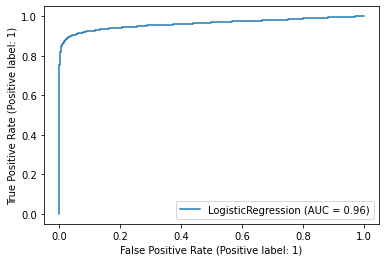

In [95]:
from sklearn.metrics import plot_roc_curve,roc_auc_score

plot_roc_curve(LR,X,y)


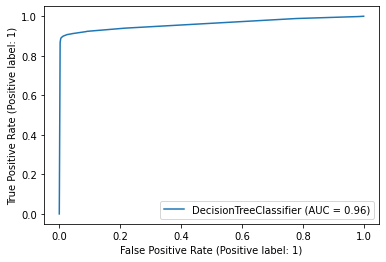

In [96]:
plot_roc_curve(DT,X,y)

### Random Forest 


              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1085
           1       0.97      0.90      0.94       913

    accuracy                           0.94      1998
   macro avg       0.95      0.94      0.94      1998
weighted avg       0.95      0.94      0.94      1998

F1 Score of the fitted model is : 0.9432


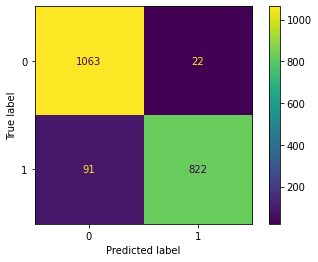

[0.94740979 0.90891395 0.93366795 0.94572832 0.94415224 0.95776855
 0.94418045 0.94879154 0.95622288 0.95478465]
Average f1 score of model is : 0.9442


<AxesSubplot:>

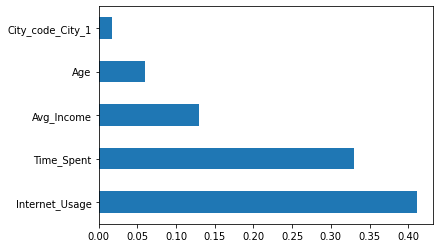

In [102]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier(n_estimators=100,max_depth=7,criterion='gini')
RF.fit(X_train,y_train)

predRF=RF.predict(X_test)

print(classification_report(y_test,predRF))
print("F1 Score of the fitted model is :",round(f1_score(y_test,predRF,average='weighted'),4))

print(plot_confusion_matrix(RF,X_test,y_test))
plt.show()


cv=cross_val_score(RF,X,y,cv=10,scoring='f1_weighted')

print(cv)
print("Average f1 score of model is :",round(np.mean(cv),4))

features=pd.Series(RF.feature_importances_,index=list(Ad_dataML.columns))
features.nlargest(5).plot(kind='barh')


['Time_Spent',
 'Age',
 'Avg_Income',
 'Internet_Usage',
 'Ad_Topic',
 'City_code',
 'Male',
 'Time_Period']

### AdaBoost


In [105]:
from sklearn.ensemble import AdaBoostClassifier

ADA=AdaBoostClassifier(base_estimator=DT,n_estimators=150,learning_rate=0.01)

ADA.fit(X_train,y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=7),
                   learning_rate=0.01, n_estimators=150)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1085
           1       0.97      0.89      0.93       913

    accuracy                           0.94      1998
   macro avg       0.94      0.93      0.94      1998
weighted avg       0.94      0.94      0.94      1998

F1 Score of the fitted model is : 0.9376


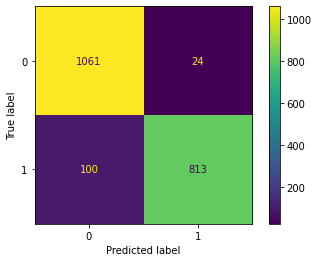

[0.95189419 0.90303584 0.9351905  0.94572832 0.92472202 0.95318409
 0.94273948 0.94278717 0.94718958 0.94417682]
Average f1 score of model is : 0.9391


<AxesSubplot:>

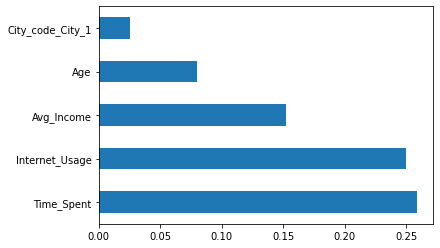

In [113]:
predADA=ADA.predict(X_test)

print(classification_report(y_test,predADA))
print("F1 Score of the fitted model is :",round(f1_score(y_test,predADA,average='weighted'),4))

print(plot_confusion_matrix(ADA,X_test,y_test))
plt.show()

cv=cross_val_score(ADA,X,y,cv=10,scoring='f1_weighted')

print(cv)
print("Average f1 score of model is :",round(np.mean(cv),4))

features=pd.Series(ADA.feature_importances_,index=list(Ad_dataML.columns))
features.nlargest(5).plot(kind='barh')



### XGBoost

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1085
           1       0.98      0.88      0.93       913

    accuracy                           0.94      1998
   macro avg       0.94      0.93      0.93      1998
weighted avg       0.94      0.94      0.94      1998

F1 score of fitted model is : 0.9350532195869328


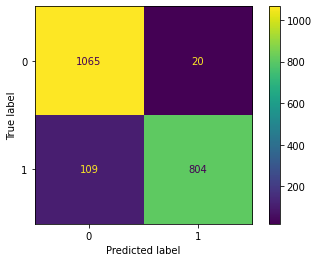

<AxesSubplot:>

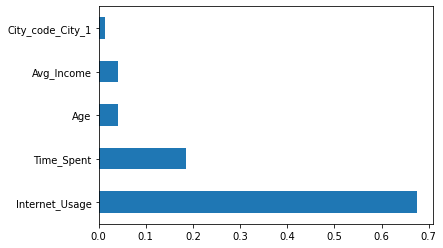

In [130]:
from xgboost import XGBClassifier

XGB=XGBClassifier(n_estimators=100,max_depth=6,learning_rate=0.01,objective='binary:logistic',booster='gbtree',eval_metric='logloss')

XGB.fit(X_train,y_train)

predXGB=XGB.predict(X_test)

print(classification_report(y_test,predXGB))
print("F1 score of fitted model is :",f1_score(y_test,predXGB,average='weighted'))

print(plot_confusion_matrix(XGB,X_test,y_test))
plt.show()

features=pd.Series(XGB.feature_importances_,index=list(Ad_dataML.columns))
features.nlargest(5).plot(kind='barh')